In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

# Section 1: Exploratory Data Analysis

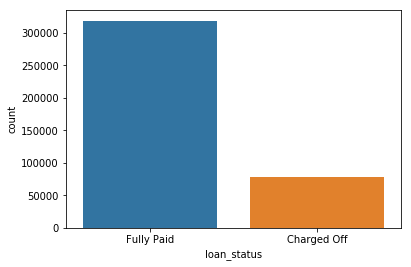

In [4]:
#Since we will be attempting to predict loan_status, create a countplot of it
sns.countplot(x='loan_status', data = df)

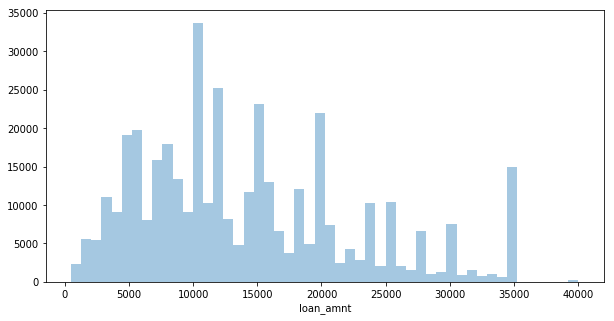

In [7]:
#Create a histogram of the loan_amnt column
plt.figure(figsize=(10,5))
sns.distplot(df['loan_amnt'],kde = False)

In [8]:
#explore correlation between the continuous feature variables
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


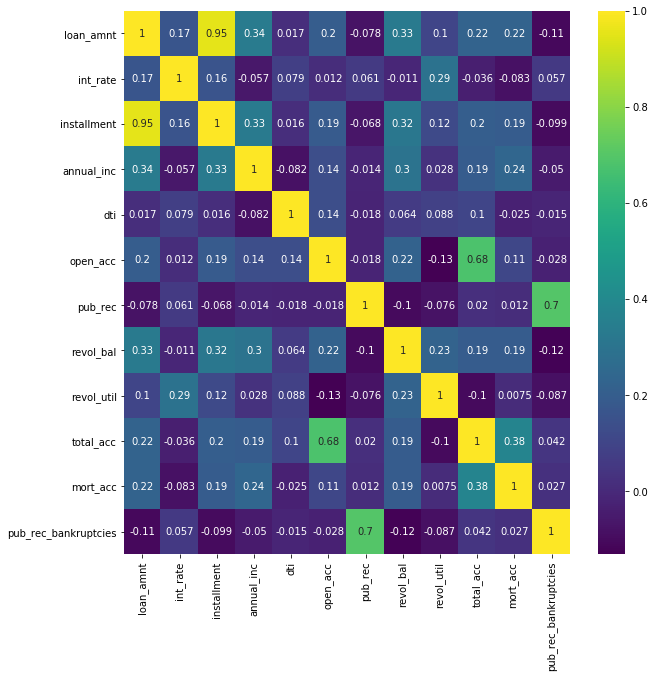

In [9]:
#Visualize this using a heatmap
plt.figure(figsize = (10,10))
correlation = df.corr()
sns.heatmap(correlation,cmap = "viridis",annot=True)

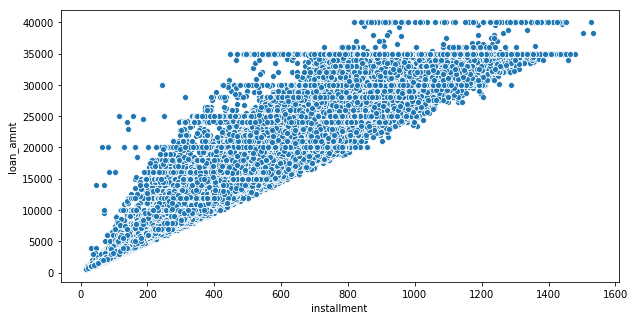

In [10]:
# we can see that 'loan_amnt' and 'installment' have strong correlation, check the scatterplot of them
plt.figure(figsize = (10,5))
sns.scatterplot(y='loan_amnt',x='installment',data = df)

In [ ]:
#from the scatterplot we can see that, higher loan_amnt more various installment

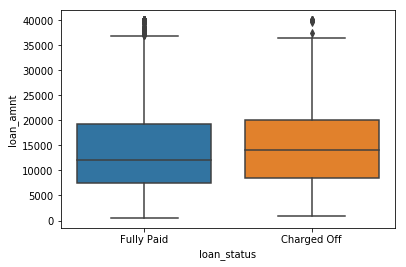

In [11]:
#Create a boxplot showing the relationship between the loan_status and the Loan Amount
# is there a relationship between maybe really expensive loans and not being able to paid them off
# or very low amount loans and then fully paying those off
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

In [12]:
#Calculate the summary statistics for the loan amount, grouped by the loan_status
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
# they are very similar here, so the 'loan_amnt' isn't the key indicator of whether or not 
# someone's going to pay off their loan

In [ ]:
# explore the Grade and SubGrade columns that LendingClub attributes to the loans.
# What are the unique possible grades and subgrades

In [13]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [14]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

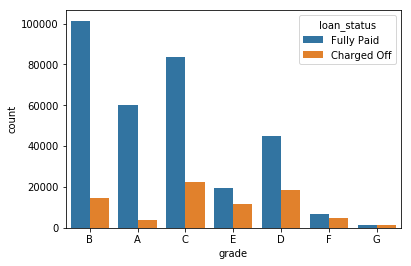

In [15]:
# countplot per grade
sns.countplot(x='grade',hue = 'loan_status',data = df)

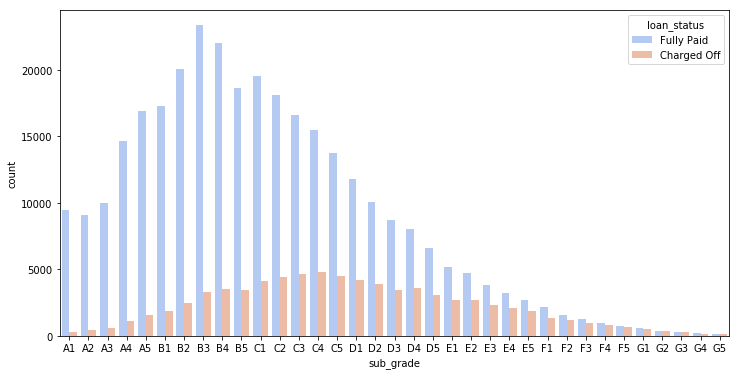

In [16]:
# countplot per sub_grade
plt.figure(figsize = (12,6))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x ='sub_grade',data = df, order = subgrade_order, hue = 'loan_status',palette='coolwarm')

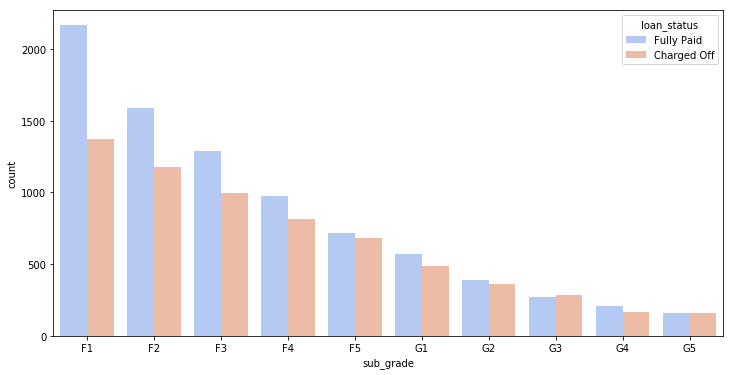

In [17]:
# It looks like F and G subgrades don't get paid back that often. 
# Isloate those and recreate the countplot just for those subgrades.
data1 = df[(df['grade']=='F') | (df['grade']=='G')]
plt.figure(figsize = (12,6))
subgrade_order = sorted(data1['sub_grade'].unique())
sns.countplot(x ='sub_grade',data = data1, order = subgrade_order, hue = 'loan_status',palette='coolwarm')

In [18]:
#Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" 
# and a 0 if it was "Charged Off"
def match(x):
    if x == 'Fully Paid':
        return 1
    else:
        return 0
df['loan_repaid'] = df['loan_status'].apply(lambda x : match(x))

In [19]:
df[['loan_repaid','loan_status']].head(15)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
5,1,Fully Paid
6,1,Fully Paid
7,1,Fully Paid
8,1,Fully Paid
9,1,Fully Paid


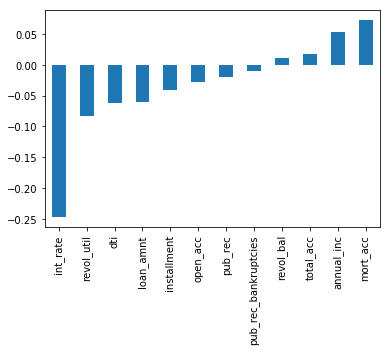

In [24]:
#Create a bar plot showing the correlation of the numeric features to the new loan_repaid column
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

In [ ]:
# no numeric feature has a very strong correlation with 'loan_repaid'
# but int_rate has the strongest correlation with 'loan_repaid', which is reasonable
# higher int_rate, more difficult to pay off the loan

# Section 2: Data PreProcessing

**1. Remove or fill any missing data. **

**2. Remove unnecessary or repetitive features. **

**3. Convert categorical string features to dummy variables.**

In [25]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

In [26]:
#length of the dataframe
len(df)

396030

In [27]:
#displays the total count of missing values per column
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [28]:
#Convert this Series to be in term of percentage of the total DataFrame
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [29]:
#How many unique employment job titles are there
df['emp_title'].nunique()

173105

In [30]:
df['emp_title'].value_counts()

Teacher                               4389
Manager                               4250
Registered Nurse                      1856
RN                                    1846
Supervisor                            1830
Sales                                 1638
Project Manager                       1505
Owner                                 1410
Driver                                1339
Office Manager                        1218
manager                               1145
Director                              1089
General Manager                       1074
Engineer                               995
teacher                                962
driver                                 882
Vice President                         857
Operations Manager                     763
Administrative Assistant               756
Accountant                             748
President                              742
owner                                  697
Account Manager                        692
Police Offi

In [31]:
# there are too many unique values, which is not very informative for the prediction
# drop this feature
df = df.drop('emp_title', axis =1)


In [32]:
#count plot of the emp_length feature column
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

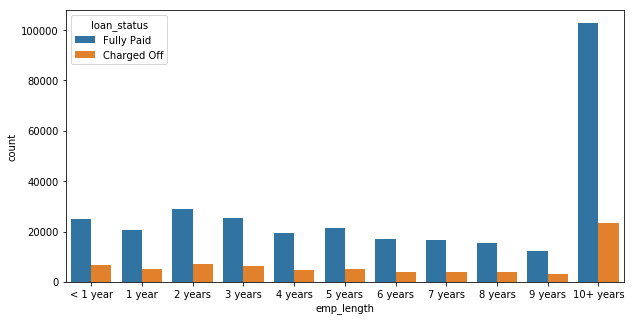

In [34]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']
plt.figure(figsize = (10,5))
sns.countplot(x='emp_length',data = df, order=emp_length_order,hue = 'loan_status')

In [35]:
# This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. 
# Essentially informing us what percent of people per employment category didn't pay back their loan.

In [36]:
ratio = df[df['loan_status']=='Charged Off']['emp_length'].value_counts()/df[df['loan_status']!='Charged Off']['emp_length'].value_counts()
ratio

1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: emp_length, dtype: float64

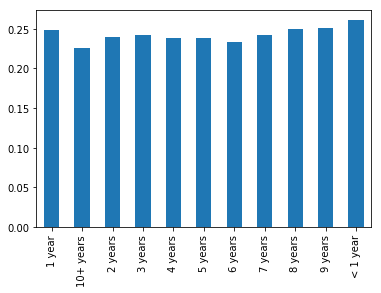

In [37]:
ratio.plot(kind = 'bar')

In [40]:
#Charge off rates are extremely similar across all employment lengths.
#drop the emp_length column.
df = df.drop('emp_length',axis = 1)

In [41]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [42]:
# check the title col and purpose col
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [43]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [44]:
# The title column is simply a string subcategory/description of the purpose column
# drop the title column
df = df.drop('title',axis=1)

In [45]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
# check the missing value of 'mort_acc' feature
# 'mort_acc' feature represents Number of mortgage accounts

In [47]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [49]:
#review the other columsn to see which most highly correlates to mort_acc
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [50]:
#Looks like the total_acc feature correlates with the mort_acc 
#group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
7.0      0.221695
8.0      0.308422
9.0      0.365499
10.0     0.429158
11.0     0.526570
12.0     0.618034
13.0     0.722124
14.0     0.803482
15.0     0.940142
16.0     1.007405
17.0     1.151269
18.0     1.235885
19.0     1.358013
20.0     1.409380
21.0     1.519932
22.0     1.640736
23.0     1.721794
24.0     1.845867
25.0     1.900506
26.0     1.987414
27.0     2.103573
28.0     2.163050
29.0     2.231043
30.0     2.331386
31.0     2.390104
           ...   
90.0     2.000000
91.0     3.333333
92.0     5.000000
93.0     2.111111
94.0     2.909091
95.0     1.800000
96.0     3.000000
97.0     4.500000
98.0     0.500000
99.0     4.200000
100.0    4.000000
101.0    2.500000
102.0    3.500000
103.0    0.000000
104.0    8.000000
105.0    3.666667
106.0    1.500000
107.0    3.000000
108.0    0.000000
110.0    3.000000
111.0    2.000000
115.0    8.000000
116.0    4.500000
117.0    0.000000


In [ ]:
# fill in the missing mort_acc values based on their total_acc value. 
# If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value

In [51]:
dic = df.groupby('total_acc')['mort_acc'].mean().to_dict()

In [52]:
def match_mort (x,y):
    if np.isnan(x):
        return dic[y]
    else:
        return x

In [53]:
df['mort_acc']=df.apply(lambda x:match_mort(x['mort_acc'],x['total_acc']),axis=1)

In [54]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [ ]:
#revol_util and the pub_rec_bankruptcies have missing data points, 
#but they account for less than 0.5% of the total data,drop those rows

In [55]:
df = df.dropna()

In [56]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [ ]:
# now we have completed cleaning missing data

## Categorical Variables and Dummy Variables

In [57]:
#List all the columns that are currently non-numeric.
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
#go through all the string features to see what we should do with them

### term feature

In [58]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
#Convert the term feature into either a 36 or 60 integer numeric data type

In [59]:
def match_term(x):
    return int(x.split(" ")[1])
df['term'] = df['term'].apply(lambda x:match_term(x))

In [60]:
df['term'].unique()

array([36, 60], dtype=int64)

### grade feature

In [61]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [62]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [63]:
# grade is part of sub_grade, so drop the grade feature
df = df.drop('grade',axis=1)

### sub_grade feature

In [64]:
#Convert the subgrade into dummy variables. 
#Then concatenate these new columns to the original dataframe
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [65]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [66]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [67]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose
Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe

In [68]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [69]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [70]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [71]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [72]:
more_dummy = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [73]:
more_dummy.head(5)

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),more_dummy],axis=1)

In [75]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership
**Review the value_counts for the home_ownership column.**

In [76]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [77]:
# replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER
def to_other(s):
    if s=='NONE'or s=='ANY':
        return "OTHER"
    else:
        return s
df['home_ownership'] = df['home_ownership'].apply(lambda x:to_other(x))

In [78]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [79]:
# Convert these to dummy variables，then concatenate them with the original dataframe
ownership_dummy = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),ownership_dummy],axis=1)

In [80]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

### address
**feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [81]:
df.select_dtypes("object").columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [82]:
df['address'].head(5)

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [83]:
df['zip_code'] = df['address'].apply(lambda x : x[-5:])

In [84]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [85]:
zipcode_dummy = pd.get_dummies(df['zip_code'],drop_first=True)

In [86]:
df = pd.concat([df.drop(['zip_code','address'],axis=1),zipcode_dummy],axis=1)

In [87]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [88]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature , then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [89]:
df.select_dtypes('object').columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [90]:
df['earliest_cr_line'].head(5)

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [91]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x :int(x[-4:]))

In [92]:
df['earliest_cr_year'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
1998    22695
2004    20875
1997    18702
1996    18362
2005    17388
1995    16911
1994    15394
2006    15108
1993    12092
2007    11310
1992     8863
1990     8511
1991     8099
1989     7604
2008     7093
1988     6258
1987     5524
1986     4657
1985     4150
2009     3874
1984     3758
2010     3156
1983     3075
1982     2261
2011     2133
        ...  
1976      891
2012      791
1975      687
1974      606
1973      539
1972      468
1970      326
1971      310
1969      268
1967      198
1968      192
1966      117
1965      104
2013       99
1964       79
1963       60
1962       37
1961       23
1960       22
1959       17
1958       12
1955        9
1957        7
1956        7
1954        4
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_year, Length: 65, dtype: int64

In [93]:
df = df.drop('earliest_cr_line',axis=1)

In [94]:
df.select_dtypes("object").columns

Index(['loan_status'], dtype='object')

## Train Test Split

In [95]:
from sklearn.model_selection import train_test_split

In [ ]:
#drop the load_status column we created earlier, since its a duplicate of the loan_repaid column.
#We'll use the loan_repaid column since its already in 0s and 1s.

In [96]:
df = df.drop('loan_status',axis=1)

In [97]:
# Set X and y variables to the .values of the features and label
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [98]:
type(y)

numpy.ndarray

In [99]:
len(y)

395219

In [100]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Use a MinMaxScaler to normalize the feature data X_train and X_test. **

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [102]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Creating the Model

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [104]:
len(df.columns)

79

In [ ]:
# build a a model that goes 78 --> 39 --> 19--> 1 output neuron
# with dropout layer

In [107]:
model = Sequential()

#input layer
model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.2))

#hidder layer
model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.2))

#binary_classification 
#output layer
model.add(Dense(units=1,activation='sigmoid'))

#model compile
model.compile(optimizer='adam',loss='binary_crossentropy')

In [106]:
# add earlystop to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [108]:
# fit the model
model.fit(X_train,y_train,batch_size=256,epochs=50,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 316175 samples, validate on 79044 samples
Epoch 1/50
316175/316175 [==============================] - 6s 18us/step - loss: 0.3009 - val_loss: 0.2670
Epoch 2/50
316175/316175 [==============================] - 5s 15us/step - loss: 0.2653 - val_loss: 0.2633
Epoch 3/50
316175/316175 [==============================] - 4s 14us/step - loss: 0.2629 - val_loss: 0.2623
Epoch 4/50
316175/316175 [==============================] - 4s 14us/step - loss: 0.2616 - val_loss: 0.2624
Epoch 5/50
316175/316175 [==============================] - 4s 14us/step - loss: 0.2606 - val_loss: 0.2621
Epoch 6/50
316175/316175 [==============================] - 4s 14us/step - loss: 0.2603 - val_loss: 0.2618
Epoch 7/50
316175/316175 [==============================] - 5s 15us/step - loss: 0.2600 - val_loss: 0.2621
Epoch 8/50
316175/316175 [==============================] - 5s 16us/step - loss: 0.2596 - val_loss: 0.2625
Epoch 9/50
316175/316175 [==============================] - 4s 14us/step - loss: 0.2591 - val

# Section 3: Evaluating Model Performance.

In [109]:
losses = pd.DataFrame(model.history.history)

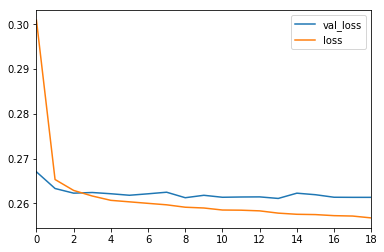

In [110]:
losses.plot()

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
prediction = model.predict_classes(X_test)

In [113]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [114]:
confusion_matrix(y_test,prediction)

array([[ 6906,  8752],
       [  162, 63224]], dtype=int64)